<a href="https://colab.research.google.com/github/HaHuyHoang19146188/BAII-TAP-AI/blob/main/Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  

In [ ]:
(x_train, y_train),(x_test,y_test) = mnist.load_data()


In [ ]:
print("Dimension of x_train: " ,x_train.shape)
print("Dimension of y_train: " ,y_train.shape)
print("Dimension of x_test: " ,x_test.shape)
print("Dimension of y_test: " ,y_test.shape)

Dimension of x_train:  (60000, 28, 28)
Dimension of y_train:  (60000,)
Dimension of x_test:  (10000, 28, 28)
Dimension of y_test:  (10000,)


In [ ]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /=255
x_test /=255

y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [ ]:
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(), metrics=['accuracy'])

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(), metrics=['accuracy'])
from keras.callbacks import EarlyStopping
history = model.fit(x_train,y_train,batch_size=128,epochs=500,verbose=1,
                    validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=50)])

Epoch 1/500
375/375 [==============================] - 9s 21ms/step - loss: 0.2738 - accuracy: 0.9155 - val_loss: 0.1354 - val_accuracy: 0.9605
Epoch 2/500
375/375 [==============================] - 7s 19ms/step - loss: 0.1123 - accuracy: 0.9657 - val_loss: 0.1044 - val_accuracy: 0.9703
Epoch 3/500
375/375 [==============================] - 7s 19ms/step - loss: 0.0794 - accuracy: 0.9758 - val_loss: 0.0845 - val_accuracy: 0.9764
Epoch 4/500
375/375 [==============================] - 7s 19ms/step - loss: 0.0639 - accuracy: 0.9807 - val_loss: 0.0916 - val_accuracy: 0.9753
Epoch 5/500
375/375 [==============================] - 7s 19ms/step - loss: 0.0514 - accuracy: 0.9849 - val_loss: 0.0830 - val_accuracy: 0.9779
Epoch 6/500
375/375 [==============================] - 7s 20ms/step - loss: 0.0425 - accuracy: 0.9869 - val_loss: 0.0925 - val_accuracy: 0.9784
Epoch 7/500
375/375 [==============================] - 7s 20ms/step - loss: 0.0365 - accuracy: 0.9890 - val_loss: 0.0987 - val_accuracy:

In [ ]:
# Đánh giá mô hình
score = model.evaluate(x_test,y_test,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])

Sai số kiểm tra là:  0.2297811061143875
Độ chính xác kiểm tra là:  0.9837999939918518


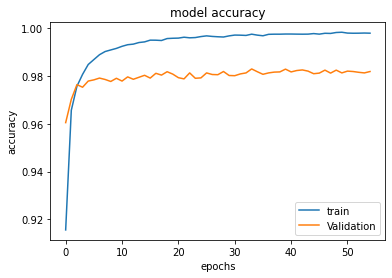

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','Validation'])
plt.show()